# Standard Imports

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
from IPython.display import display # display(df) shows dataframe in html formatting

print(sys.version)
print(np.__version__)
print(pd.__version__)

3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
1.11.1
0.18.1


In [2]:
## Example for displaying more of a dataframe
# with pd.option_context('display.max_rows',300,'display.max_columns', 100):
#     display(df)

# Loading SF Fire data

In [3]:
sf_fire_path = './Fire_Department_Calls_for_Service.csv'

In [4]:
# getting a row count from the data file
!wc -l $sf_fire_path

4437245 ./Fire_Department_Calls_for_Service.csv


In [5]:
# Importing data and timing the import
t1 = time.time()
df = pd.read_csv(sf_fire_path)
t2 = time.time()
print(t2-t1)

C:\Users\banza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


38.39258074760437


In [6]:
# sorting by incident
df.sort_values('Incident Number', inplace=True)

# Initial exploration

In [7]:
with pd.option_context('display.max_rows',300,'display.max_columns', 100):
    display(df.head(200))

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:12:11 PM,04/12/2000 09:19:36 PM,04/12/2000 09:43:57 PM,04/12/2000 10:03:33 PM,Other,04/12/2000 10:23:57 PM,1700 Block of 43RD AVE,SF,94122.0,B08,23,7651,3,3,3,True,NaN,1,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14
4985,1030104,E23,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:11:51 PM,04/12/2000 09:14:32 PM,NaN,NaN,Other,04/12/2000 09:30:04 PM,1700 Block of 43RD AVE,SF,94122.0,B08,23,7651,3,3,3,False,NaN,1,ENGINE,1.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-E23
2,1030106,M36,30614,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:44 PM,04/12/2000 09:10:56 PM,04/12/2000 09:11:47 PM,NaN,04/12/2000 09:14:11 PM,04/12/2000 09:59:31 PM,04/12/2000 10:10:06 PM,Other,04/12/2000 10:43:40 PM,0 Block of FELL ST,SF,94102.0,B02,36,3111,3,3,3,False,NaN,1,MEDIC,1.0,2,6,Tenderloin,"(37.7764405100838, -122.418481123408)",001030106-M36
3,1030107,E01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,04/12/2000 09:14:13 PM,04/12/2000 09:15:58 PM,04/12/2000 09:20:12 PM,NaN,NaN,Other,04/12/2000 09:24:19 PM,100 Block of JONES ST,SF,94102.0,B03,1,1456,3,3,3,False,NaN,1,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01
4987,1030107,T01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,04/12/2000 09:14:13 PM,04/12/2000 09:16:08 PM,04/12/2000 09:19:16 PM,NaN,NaN,Other,04/12/2000 09:24:22 PM,100 Block of JONES ST,SF,94102.0,B03,1,1456,3,3,3,False,NaN,1,TRUCK,1.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-T01
4986,1030107,B02,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,04/12/2000 09:14:13 PM,04/12/2000 09:16:29 PM,04/12/2000 09:19:33 PM,NaN,NaN,Other,04/12/2000 09:24:14 PM,100 Block of JONES ST,SF,94102.0,B03,1,1456,3,3,3,True,NaN,1,CHIEF,2.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-B02
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:20 PM,04/12/2000 09:20:08 PM,NaN,NaN,Other,04/12/2000 09:20:36 PM,700 Block of MARKET ST,SF,94108.0,B03,1,1322,3,3,3,False,NaN,1,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1
4988,1030108,M01,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:15 PM,04/12/2000 09:20:03 PM,04/12/2000 09:38:18 PM,04/12/2000 09:50:17 PM,Other,04/12/2000 10:27:53 PM,700 Block of MARKET ST,SF,94108.0,B03,1,1322,3,3,3,True,NaN,1,MEDIC,1.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-M01
5,1030112,T03,30620,Citizen Assist / Service Call,04/12/2000,04/12/2000,04/12/2000 09:24:27 PM,04/12/2000 09:24:54 PM,04/12/2000 09:25:10 PM,04/12/2000 09:27:10 PM,04/12/2000 09:30:26 PM,NaN,NaN,Other,04/12/2000 09:44:28 PM,800 Block of SUTTER ST,SF,94109.0,B01,3,1463,3,3,3,False,NaN,1,TRUCK,1.0,1,3,Nob Hill,"(37.7884388430214, -122.414352343522)",001030112-T03
4989,1030113,M07,30621,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:25:14 PM,04/12/2000 09:25:48 PM,04/12/2000 09:26:15 PM,04/12/2000 09:28:05 PM,NaN,04/12/2000 09:43:38 PM,04/12/2000 09:48:1

In [8]:
# No NULL values for location, which is good
sum(pd.isnull(df.Location))

0

In [9]:
# Call Type Group has 2.8M Null value. Probably won't be usefull.
sum(pd.isnull(df['Call Type Group']))

2804359

In [10]:
# Checking distribution of call types
temp = df['Call Type'].value_counts()
print('Call type counts:')
print(temp)
print('\nAs a percent:')
print(100 * temp/temp.sum())

Call type counts:
Medical Incident                                2869424
Structure Fire                                   594957
Alarms                                           473019
Traffic Collision                                181157
Other                                             71805
Citizen Assist / Service Call                     67256
Outside Fire                                      51598
Vehicle Fire                                      21870
Water Rescue                                      21160
Gas Leak (Natural and LP Gases)                   16173
Electrical Hazard                                 12378
Odor (Strange / Unknown)                          12186
Elevator / Escalator Rescue                       11529
Smoke Investigation (Outside)                      9617
Fuel Spill                                         5228
HazMat                                             3744
Industrial Accidents                               2769
Explosion                     

In [11]:
# Checking distribution of unit types
temp = df['Unit Type'].value_counts()
print('Unit type counts:')
print(temp)
print('\nAs a percent:')
print(100 * temp/temp.sum())

Unit type counts:
ENGINE            1721093
MEDIC             1371897
TRUCK              484426
CHIEF              327309
PRIVATE            255616
RESCUE CAPTAIN     154419
RESCUE SQUAD        82130
AIRPORT             19293
SUPPORT             16212
INVESTIGATION        4849
Name: Unit Type, dtype: int64

As a percent:
ENGINE            38.787432
MEDIC             30.917772
TRUCK             10.917272
CHIEF              7.376403
PRIVATE            5.760693
RESCUE CAPTAIN     3.480066
RESCUE SQUAD       1.850924
AIRPORT            0.434797
SUPPORT            0.365362
INVESTIGATION      0.109280
Name: Unit Type, dtype: float64


In [12]:
# Checking distribution of call sequence numbers.
df['Unit sequence in call dispatch'].value_counts()

1.0     1993647
2.0     1405780
3.0      585386
4.0      145105
5.0       66006
6.0       48167
7.0       40757
8.0       36981
9.0       34723
10.0      32725
11.0      16375
12.0       9313
13.0       5630
14.0       3308
15.0       2055
16.0       1336
17.0       1028
18.0        870
19.0        761
20.0        701
21.0        667
22.0        634
23.0        600
24.0        526
25.0        445
26.0        373
27.0        308
28.0        263
29.0        231
30.0        208
         ...   
54.0         24
55.0         21
56.0         21
57.0         19
58.0         17
59.0         16
60.0         12
62.0         11
61.0         11
63.0         10
64.0          9
65.0          8
66.0          7
71.0          5
67.0          5
68.0          5
69.0          5
70.0          5
72.0          4
73.0          4
74.0          4
75.0          4
77.0          3
78.0          3
79.0          3
76.0          3
81.0          1
82.0          1
80.0          1
83.0          1
Name: Unit sequence in c

Exploring the incident with 83 units responding to check if there is something wrong with these high counts. Turns out it was the Bernal Heights fire in SF in June 2016
http://abc7news.com/news/two-injured-in-fire-that-damaged-6-buildings-in-san-francisco/1391617/

In [13]:
incident_id = df[df['Unit sequence in call dispatch'] == 83]['Incident Number'].values[0]
incident_id

16067026

In [14]:
df_83 = df[df['Incident Number'] == incident_id]

In [15]:
df_83

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
4058049,161701875,E07,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/18/2016 02:23:12 PM,06/18/2016 02:23:27 PM,...,True,Fire,5,ENGINE,6.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E07
4058050,161701875,E08,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/19/2016 11:29:17 AM,06/19/2016 11:54:27 AM,...,True,Fire,5,ENGINE,75.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E08
4058051,161701875,E09,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/18/2016 02:24:30 PM,06/18/2016 02:24:45 PM,...,True,Fire,5,ENGINE,10.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E09
4058052,161701875,E10,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/18/2016 11:28:03 PM,06/18/2016 11:34:09 PM,...,True,Fire,5,ENGINE,63.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E10
4058053,161701875,E11,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/18/2016 02:19:54 PM,06/18/2016 02:20:35 PM,...,True,Fire,5,ENGINE,1.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E11
4058054,161701875,E12,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/18/2016 03:53:43 PM,06/18/2016 03:55:57 PM,...,True,Fire,5,ENGINE,47.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E12
4058055,161701875,E13,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/19/2016 03:44:37 AM,06/19/2016 03:44:37 AM,...,True,Fire,5,ENGINE,81.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E13
4058056,161701875,E14,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/19/2016 03:44:37 AM,06/19/2016 03:44:37 AM,...,True,Fire,5,ENGINE,69.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E14
4058058,161701875,E16,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/19/2016 03:44:37 AM,06/19/2016 03:44:37 AM,...,True,Fire,5,ENGINE,71.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E16
4058060,161701875,E19,16067026,Structure Fire,06/18/2016,06/18/2016,06/18/2016 02:19:13 PM,06/18/2016 02:19:40 PM,06/19/2016 12:00:53 AM,06/19/2016 12:00:53 AM,...,True,Fire,5,ENGINE,67.0,6,9,Bernal Heights,"(37.7436052440139, -122.421251086174)",161701875-E19


In [16]:
# Number of unique incidents
len(df['Incident Number'].value_counts())

1993975

In [17]:
# Number of records for unit type medic
medic_records = df[df['Unit Type'] == 'MEDIC']
len(medic_records)

1371897

In [18]:
# Number of unique incidents that dispatched a medic unit
len(df[df['Unit Type'] == 'MEDIC']['Incident Number'].unique())

1285878

In [19]:
# Number of records for medical incident
med_incident_records = df[df['Call Type'] == 'Medical Incident']
len(med_incident_records)

2869424

In [81]:
# Number of unique incidents of type 'medical incident'
len(df[df['Call Type'] == 'Medical Incident']['Incident Number'].unique())

1424642

In [21]:
# counting records that were medical incidents but didn't have a medic unit dispatched
medic_set = set(medic_records['Incident Number'])
med_inc_set = set(med_incident_records['Incident Number'])
no_medic = med_inc_set - medic_set
len(no_medic)

241975

Interesting that medics aren't dispatched to some medical incident calls. Are we still interested in such calls? I think so, because at this point we are just trying to identify the distribution of EMS calls. We don't care if Fire or Ambulance are performing the medical care. On the other hand, we want the distribution to represent calls that an Ambulance could have been dispatched to, so including these calls assumes that there wasn't some factor to these calls that eliminated the medic unit from being considered. **NOTE: This is largely resolved below. These calls were primarily serviced by private ambulances instead of medics.**

In [22]:
# counting records without various times
print('Received:', sum(pd.isnull(df['Received DtTm'])))
print('Entry:', sum(pd.isnull(df['Entry DtTm'])))
print('Dispatch:', sum(pd.isnull(df['Dispatch DtTm'])))
print('Response:', sum(pd.isnull(df['Response DtTm'])))
print('On Scene:', sum(pd.isnull(df['On Scene DtTm'])))
print('Transport:', sum(pd.isnull(df['Transport DtTm'])))
print('Hospital:', sum(pd.isnull(df['Hospital DtTm'])))
print('Available:', sum(pd.isnull(df['Available DtTm'])))

Received: 0
Entry: 0
Dispatch: 0
Response: 396468
On Scene: 1034187
Transport: 3285924
Hospital: 3417532
Available: 76816


The above time data mostly makes sense. The first three should be complete data, since they all happen every time a unit is dispatched. Others are optional, but we should expect Response -> Hospital to have increasing numbers of nulls, since you must do them in order, but don't have to do all of them. Response doesn't follow this pattern however - perhaps some units just don't log a response time or something? Available is also unclear. Under what circumstances would a unit be dispatched but not become available again? Possibly if the dispatch occurs at the end of a shift, and so the unit ends their shift on that call. Seems safe to filter out calls that never arrived on scene, since these are likely to have been called back either because another unit arrived and didn't need them or the call was bogus to begin with.

#### Investigating the 'Private' unit type

In [23]:
df_private = df[df['Unit Type'] == 'PRIVATE']
len(df_private)

255616

In [24]:
with pd.option_context('display.max_rows',300,'display.max_columns', 100):
    display(df_private.head(200))

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
22,1030142,K439,30650,Medical Incident,04/12/2000,04/12/2000,04/12/2000 10:08:59 PM,04/12/2000 10:11:22 PM,04/12/2000 10:13:08 PM,04/12/2000 10:17:11 PM,04/12/2000 10:19:49 PM,04/12/2000 10:23:38 PM,04/12/2000 10:51:51 PM,Other,04/12/2000 10:52:39 PM,2400 Block of SUTTER ST,SF,94115.0,B05,10,4155,2,2,2,False,NaN,1,PRIVATE,1.0,5,2,Pacific Heights,"(37.7851959510121, -122.440715841453)",001030142-K439
47,1040027,A782,30717,Medical Incident,04/13/2000,04/12/2000,04/13/2000 01:54:59 AM,04/13/2000 01:58:10 AM,04/13/2000 01:59:36 AM,04/13/2000 02:12:36 AM,NaN,04/13/2000 02:22:30 AM,04/13/2000 02:40:22 AM,Other,04/13/2000 03:11:44 AM,1500 Block of CALIFORNIA ST,SF,94109.0,B04,41,1635,1,1,2,False,NaN,1,PRIVATE,3.0,4,3,Nob Hill,"(37.7906289225699, -122.41985085623)",001040027-A782
81,1040071,A909,30757,Medical Incident,04/13/2000,04/13/2000,04/13/2000 08:43:02 AM,04/13/2000 08:45:07 AM,04/13/2000 08:46:35 AM,04/13/2000 08:48:11 AM,NaN,NaN,NaN,Other,04/13/2000 08:55:42 AM,1000 Block of DOLORES ST,SF,94114.0,B06,11,5513,3,3,3,False,NaN,1,PRIVATE,3.0,6,8,Noe Valley,"(37.7526291900462, -122.425380466691)",001040071-A909
5059,1040085,A897,30772,Medical Incident,04/13/2000,04/13/2000,04/13/2000 10:20:46 AM,04/13/2000 10:21:35 AM,04/13/2000 10:22:34 AM,04/13/2000 10:23:21 AM,04/13/2000 10:26:01 AM,NaN,NaN,Other,04/13/2000 10:51:12 AM,100 Block of COLLINGWOOD ST,SF,94114.0,B06,6,543,3,3,3,False,NaN,1,PRIVATE,1.0,6,8,Castro/Upper Market,"(37.7600190563185, -122.436104378198)",001040085-A897
111,1040111,A897,30798,Medical Incident,04/13/2000,04/13/2000,04/13/2000 11:27:40 AM,04/13/2000 11:28:56 AM,04/13/2000 11:33:48 AM,NaN,04/13/2000 11:42:12 AM,04/13/2000 01:34:15 PM,04/13/2000 01:34:20 PM,Other,04/13/2000 11:34:06 AM,800 Block of BRODERICK ST,SF,94115.0,B05,21,4242,2,2,2,False,NaN,1,PRIVATE,1.0,5,5,Western Addition,"(37.7780577934564, -122.440051794058)",001040111-A897
115,1040116,A909,30804,Medical Incident,04/13/2000,04/13/2000,04/13/2000 11:42:04 AM,04/13/2000 11:44:04 AM,04/13/2000 11:51:42 AM,NaN,04/13/2000 12:08:35 PM,NaN,NaN,No Merit,04/13/2000 12:23:29 PM,300 Block of ELLIS ST,SF,94102.0,B03,3,1461,1,1,2,False,NaN,1,PRIVATE,1.0,3,6,Tenderloin,"(37.7850246606887, -122.411971890566)",001040116-A909
120,1040122,A889,30808,Medical Incident,04/13/2000,04/13/2000,04/13/2000 12:01:29 PM,04/13/2000 12:02:36 PM,04/13/2000 12:03:20 PM,04/13/2000 12:04:10 PM,04/13/2000 12:14:52 PM,04/13/2000 12:25:55 PM,NaN,Other,04/13/2000 12:28:18 PM,900 Block of DOLORES ST,SF,94110.0,B06,11,5513,3,3,3,False,NaN,1,PRIVATE,1.0,6,8,Mission,"(37.754237849245, -122.425238261655)",001040122-A889
124,1040130,A727,30818,Medical Incident,04/13/2000,04/13/2000,04/13/2000 12:20:49 PM,04/13/2000 12:22:33 PM,04/13/2000 12:38:40 PM,NaN,04/13/2000 12:46:32 PM,04/13/2000 01:19:17 PM,04/13/2000 01:25:29 PM,Other,04/13/2000 01:25:32 PM,400 Block of EUREKA ST,SF,94114.0,B06,24,5465,1,1,2,False,NaN,1,PRIVATE,1.0,6,8,Noe Valley,"(37.754922335648, -122.437639904284)",001040130-A727
129,1040136,A909,30824,Medical Incident,04/13/2000,04/13/2000,04/13/2000 12:37:21 PM,04/13/2000 12:41:05 PM,04/13/2000 12:55:32 PM,04/13/2000 12:56:04 PM,NaN,04/13/2000 01:15:58 PM,04/13/2000 01:34:36 PM,Other,04/13/2000 02:12:07 PM,0 Block of JONES ST,SF,94102.0,B03,1,1455,2,2,2,False,NaN,1,PRIVATE,1.0,2,6,Tenderloin,"(37.7815955871561, -122.412190669917)",001040136-A909
138,1040149,A889,30835,Medical Incident,04/13/2000,04/13/2000,04/13/2000 01:11:06 PM,04/13/2000 01:12:16 PM,04/13/2000 01:18:48 PM,NaN,04/13/2000 01:35:17 PM,N

In [25]:
# Counts of remaining call types for private units
df_private['Call Type'].value_counts()

Medical Incident                                239304
Traffic Collision                                11956
Structure Fire                                    1491
Other                                              975
Citizen Assist / Service Call                      762
Water Rescue                                       379
Alarms                                             174
Elevator / Escalator Rescue                        115
Odor (Strange / Unknown)                            63
Vehicle Fire                                        55
Industrial Accidents                                54
Outside Fire                                        45
High Angle Rescue                                   36
Explosion                                           33
Gas Leak (Natural and LP Gases)                     29
HazMat                                              28
Extrication / Entrapped (Machinery, Vehicle)        19
Fuel Spill                                          18
Assist Pol

These seem very likely to be private ambulance company units. First, they respond almost entirely to medical-related events such as 'medical incident', 'traffic collision', and 'structure fire'. Second, many of these calls go all the way through hospital delivery. Third, all of the unit numbers appear to start with an A or K, which would align with the two private companies that currently dispatch in SF (AMR, and King American). That last point is shaky, since it compares 2017 companies to labels on 2000 calls, but the first two are strong enough.

This may resolve the point above about the 242K medical incidents without a medic. 255K 'Private' records could explain most or all of those incidents (i.e. they had a private unit dispatched instead of a medic). This point is explored more below. 

## First crack at filtering down dataset
First filtering out unwanted fields. Then removing records that either:
 - Without an On Scene Time
 - Are neither a Medical Incident/Traffic Collision nor are dispatching a medic/private unit


In [53]:
# Filtering out unwanted fields
unwanted_fields = ['Watch Date', 'Battalion', 'Station Area', 'Box', 'Call Type Group', 'Number of Alarms',
                   'Fire Prevention District', 'Supervisor District']

keep_fields = [field for field in df.columns if field not in unwanted_fields]

df_clean = df[keep_fields]

In [54]:
# Removing records with Null On Scene time
df_clean = df_clean[~pd.isnull(df['On Scene DtTm'])]
len(df_clean)

3403057

In [55]:
# Keeping only records that are either a medical incident or dispatch a medic
df_clean = df_clean[(df_clean['Call Type'].isin(['Medical Incident', 'Traffic Collision'])) | (df_clean['Unit Type'].isin(['MEDIC','PRIVATE']))]
len(df_clean)

2494027

In [56]:
# total dispatches and unique incidents
print('Dispatches      :', len(df_clean))
print('Unique Incidents:', df_clean['Incident Number'].nunique())

Dispatches      : 2494027
Unique Incidents: 1451295


In [57]:
# counting only records with medic or private unit type
temp_df = df_clean[df_clean['Unit Type'].isin(['MEDIC','PRIVATE'])]
print('Dispatches      :', len(temp_df))
print('Unique Incidents:', temp_df['Incident Number'].nunique())

Dispatches      : 1359629
Unique Incidents: 1344098


Restricting to just Medic and Private only removes ~100K incidents from the data. But before doing this we should explore the clean_df as it is right now a bit more.

In [58]:
with pd.option_context('display.max_rows',300,'display.max_columns', 100):
    display(df_clean.head(200))

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Original Priority,Priority,Final Priority,ALS Unit,Unit Type,Unit sequence in call dispatch,Neighborhooods - Analysis Boundaries,Location,RowID
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:12:11 PM,04/12/2000 09:19:36 PM,04/12/2000 09:43:57 PM,04/12/2000 10:03:33 PM,Other,04/12/2000 10:23:57 PM,1700 Block of 43RD AVE,SF,94122.0,3,3,3,True,MEDIC,2.0,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14
4985,1030104,E23,30612,Medical Incident,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:11:51 PM,04/12/2000 09:14:32 PM,NaN,NaN,Other,04/12/2000 09:30:04 PM,1700 Block of 43RD AVE,SF,94122.0,3,3,3,False,ENGINE,1.0,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-E23
2,1030106,M36,30614,Medical Incident,04/12/2000,04/12/2000 09:09:44 PM,04/12/2000 09:10:56 PM,04/12/2000 09:11:47 PM,NaN,04/12/2000 09:14:11 PM,04/12/2000 09:59:31 PM,04/12/2000 10:10:06 PM,Other,04/12/2000 10:43:40 PM,0 Block of FELL ST,SF,94102.0,3,3,3,False,MEDIC,1.0,Tenderloin,"(37.7764405100838, -122.418481123408)",001030106-M36
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:20 PM,04/12/2000 09:20:08 PM,NaN,NaN,Other,04/12/2000 09:20:36 PM,700 Block of MARKET ST,SF,94108.0,3,3,3,False,RESCUE SQUAD,2.0,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1
4988,1030108,M01,30616,Medical Incident,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:15 PM,04/12/2000 09:20:03 PM,04/12/2000 09:38:18 PM,04/12/2000 09:50:17 PM,Other,04/12/2000 10:27:53 PM,700 Block of MARKET ST,SF,94108.0,3,3,3,True,MEDIC,1.0,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-M01
4992,1030118,M08,30625,Medical Incident,04/12/2000,04/12/2000 09:27:45 PM,04/12/2000 09:28:58 PM,04/12/2000 09:29:21 PM,NaN,04/12/2000 09:35:29 PM,04/12/2000 10:00:17 PM,04/12/2000 10:13:28 PM,Other,04/12/2000 10:30:34 PM,4TH ST/CHANNEL ST,SF,NaN,3,3,3,True,MEDIC,2.0,None,"(37.7750268633971, -122.392346204303)",001030118-M08
8,1030118,E08,30625,Medical Incident,04/12/2000,04/12/2000 09:27:45 PM,04/12/2000 09:28:58 PM,04/12/2000 09:29:21 PM,04/12/2000 09:31:26 PM,04/12/2000 09:32:34 PM,NaN,NaN,Other,04/12/2000 09:45:28 PM,4TH ST/CHANNEL ST,SF,NaN,3,3,3,False,ENGINE,1.0,None,"(37.7750268633971, -122.392346204303)",001030118-E08
9,1030119,M17,30628,Medical Incident,04/12/2000,04/12/2000 09:29:54 PM,04/12/2000 09:30:16 PM,04/12/2000 09:31:26 PM,04/12/2000 09:32:41 PM,04/12/2000 09:37:43 PM,04/12/2000 09:48:49 PM,NaN,Other,04/12/2000 10:31:08 PM,1400 Block of NEWCOMB AVE,SF,94124.0,1,1,2,True,MEDIC,1.0,Bayview Hunters Point,"(37.7335924152271, -122.38701801742)",001030119-M17
11,1030122,M18,30630,Medical Incident,04/12/2000,04/12/2000 09:31:55 PM,04/12/2000 09:33:48 PM,04/12/2000 09:34:10 PM,04/12/2000 09:35:59 PM,04/12/2000 09:45:22 PM,NaN,NaN,Other,04/12/2000 09:49:52 PM,1800 Block of IRVING ST,SF,94122.0,1,1,2,False,MEDIC,1.0,Sunset/Parkside,"(37.763482287794, -122.477678638767)",001030122-M18
12,1030124,M09,30633,Medical Incident,04/12/2000,04/12/2000 09:41:20 PM,04/12/2000 09:41:39 PM,04/12/2000 09:43:19 PM,04/12/2000 09:46:26 PM,04/12/2000 09:52:57 PM,NaN,NaN,Other,04/12/2000 10:00:32 PM,21ST ST/SHOTWELL ST,SF,94110.0,1,1,2,True,MEDIC,1.0,Mission,"(37.7572324112144, -122.415626198524)",001030124-M09


In [59]:
# Counts of remaining call types
df_clean['Call Type'].value_counts()

Medical Incident                                2326309
Traffic Collision                                132644
Structure Fire                                    20454
Other                                              4823
Citizen Assist / Service Call                      4226
Water Rescue                                       1507
Alarms                                              709
Industrial Accidents                                577
Elevator / Escalator Rescue                         514
Vehicle Fire                                        313
Odor (Strange / Unknown)                            273
HazMat                                              270
Outside Fire                                        223
Gas Leak (Natural and LP Gases)                     191
Explosion                                           160
Assist Police                                       153
High Angle Rescue                                   118
Train / Rail Incident                           

In [60]:
# Remaining call type counts as a percentage
call_type_perc = 100 * df_clean['Call Type'].value_counts() / df_clean['Call Type'].value_counts().sum()
call_type_perc

Medical Incident                                93.275213
Traffic Collision                                5.318467
Structure Fire                                   0.820119
Other                                            0.193382
Citizen Assist / Service Call                    0.169445
Water Rescue                                     0.060424
Alarms                                           0.028428
Industrial Accidents                             0.023135
Elevator / Escalator Rescue                      0.020609
Vehicle Fire                                     0.012550
Odor (Strange / Unknown)                         0.010946
HazMat                                           0.010826
Outside Fire                                     0.008941
Gas Leak (Natural and LP Gases)                  0.007658
Explosion                                        0.006415
Assist Police                                    0.006135
High Angle Rescue                                0.004731
Train / Rail I

In [61]:
print(call_type_perc[0:2].sum())
print(call_type_perc[0:3].sum())

98.5936800203045
99.41379944964508


98.5% of remaining dispatches are for a medical incident or traffic collision. If you include Structure Fires, it is 99.4%. We are probably safe in removing all other types of dispatches, since they are comparatively rare.

## Filtering df_clean for only top 3 call types and continuing exploration

In [62]:
df_clean = df_clean[df_clean['Call Type'].isin(['Medical Incident', 'Traffic Collision', 'Structure Fire'])]

In [63]:
# total dispatches and unique incidents
print('Dispatches        :', len(df_clean))
print('Unique Incidents  :', df_clean['Incident Number'].nunique())
print('1-record Incidents:', sum(df_clean['Incident Number'].value_counts() == 1))

Dispatches        : 2479407
Unique Incidents  : 1437607
1-record Incidents: 594203


In [64]:
# Counts of remaining call types
df_clean['Call Type'].value_counts()

Medical Incident     2326309
Traffic Collision     132644
Structure Fire         20454
Name: Call Type, dtype: int64

In [65]:
# Counts by unit type
df_clean['Unit Type'].value_counts()

MEDIC             1128242
ENGINE             949103
PRIVATE            216767
RESCUE CAPTAIN      91746
TRUCK               43254
CHIEF               20858
RESCUE SQUAD        20191
AIRPORT              8161
SUPPORT              1016
INVESTIGATION          69
Name: Unit Type, dtype: int64

In [66]:
# number of unique incidents for each unit type
df_clean.groupby('Unit Type')['Incident Number'].nunique()

Unit Type
AIRPORT              8150
CHIEF               20418
ENGINE             876756
INVESTIGATION          69
MEDIC             1117199
PRIVATE            216210
RESCUE CAPTAIN      91498
RESCUE SQUAD        20177
SUPPORT               929
TRUCK               43110
Name: Incident Number, dtype: int64

#### Now counting dispatches for medic/private again

In [67]:
# counting only records with medic or private unit type
temp_df = df_clean[df_clean['Unit Type'].isin(['MEDIC','PRIVATE'])]
print('Dispatches      :', len(temp_df))
print('Unique Incidents:', temp_df['Incident Number'].nunique())

Dispatches      : 1345009
Unique Incidents: 1330410


After reducing to just Medic and Private unit types, it reduces the number of unique incidents by about 117K. It looks like this is probably the way to go. Most of the medic/private calls were for a medical incident or traffic collision, and most of the calls for other unit types were for incidents that also dispatched a medic/private. Seems cleaner to just reduce to medic/private. After filtering for just these two unit types, we still need a way of removing duplicate dispatches.

**Or do we?** Maybe this should be an open question. Since we already filtered out dispatches that never arrived on scene, it may be safe to assume that an incident where two medic/private arrived on scene actually needed two - in which case we would want the model weighted more heavily in those incidents having multiple dispatches.

## Filtering df_clean for only Medic and Private dispatches

In [68]:
df_clean = df_clean[df_clean['Unit Type'].isin(['MEDIC', 'PRIVATE'])]

#### Taking a look at the records with multiple on-scene dispatches to see if anything stands out. Separating incidents with only one dispatch from those with extra

In [71]:
# getting list of incidents with only 1 record
temp = df_clean['Incident Number'].value_counts()
one_rec_incidents = list(temp[temp == 1].index)

In [72]:
# slicing dataframe between incidents with single records and incidents with extra
df_single = df_clean[df_clean['Incident Number'].isin(one_rec_incidents)]
df_extra = df_clean[~df_clean['Incident Number'].isin(one_rec_incidents)]

In [73]:
df_single['Unit Type'].value_counts()

MEDIC      1104482
PRIVATE     212742
Name: Unit Type, dtype: int64

In [74]:
df_extra['Unit Type'].value_counts()

MEDIC      23760
PRIVATE     4025
Name: Unit Type, dtype: int64

In [75]:
# counting
print('Dispatches      :', len(df_extra))
print('Unique Incidents:', df_extra['Incident Number'].nunique())

Dispatches      : 27785
Unique Incidents: 13186


Only ~13k incidents have more than one unit assigned to them. Checking the distribution of the number of records.

In [76]:
# Checking distribution of call sequence numbers.
df_extra['Unit sequence in call dispatch'].value_counts()

2.0     7963
3.0     6962
1.0     5279
4.0     2609
5.0     1396
6.0      904
7.0      593
8.0      297
9.0      227
10.0     188
13.0     187
11.0     169
12.0     165
14.0     116
15.0      86
17.0      66
16.0      62
19.0      61
20.0      51
18.0      49
21.0      47
22.0      33
24.0      32
23.0      30
25.0      28
26.0      25
27.0      17
29.0      16
30.0      12
33.0      10
34.0      10
32.0       9
31.0       8
37.0       7
35.0       7
36.0       7
38.0       7
42.0       5
28.0       5
45.0       4
43.0       3
40.0       3
39.0       3
47.0       3
46.0       3
51.0       2
50.0       2
53.0       2
44.0       2
41.0       2
48.0       1
49.0       1
52.0       1
60.0       1
Name: Unit sequence in call dispatch, dtype: int64

There are still some high-volume dispatches in the data. We should probably exclude incidents with very high numbers of units since these are extreme events and will skew the day-to-day probability distribution we are looking for. 4 or 5 units seems like a natural breaking point from eyeballing the distribution above, and also sounds like a high-but-not-extreme number of responders. 

NOTE: Having a unit dispatched with sequence number X doesn't mean X units arrived on scene. Notice how 1s are less than 2s and 3s above. This must mean the 1st unit in some sequence was either recalled or was not a medic/private unit type. Should count the actual records to examine how many multiples of medic/private we are dealing with here.

In [78]:
multiple_counts = df_extra['Incident Number'].value_counts()
multiple_counts

13063745    13
11114184    11
17069463    10
4010008     10
14086047     9
3100148      8
9010661      8
16067026     8
5050334      7
14074884     7
14030653     7
1038764      7
2045302      7
11041094     7
6085706      6
7039516      6
6077383      6
4087991      6
16008079     6
15068639     6
11113173     6
7017133      6
17088756     6
15010877     6
6005122      6
5068818      6
11050532     6
2090471      6
10053113     6
12094502     6
            ..
9059181      2
16044896     2
9055071      2
14125915     2
5065836      2
2100123      2
15028241     2
10017697     2
4058055      2
6050784      2
11086815     2
3062749      2
4068312      2
16098254     2
5061581      2
12104652     2
11082697     2
2069448      2
10026272     2
4094885      2
17015742     2
15128437     2
1018811      2
15014778     2
3072950      2
3103665      2
10036142     2
68523        2
2026407      2
12058624     2
Name: Incident Number, dtype: int64

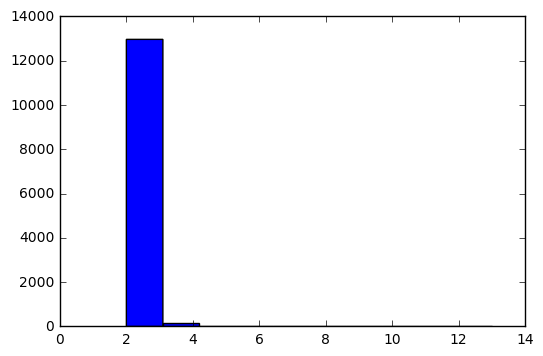

In [85]:
plt.hist(multiple_counts)
plt.show()

In [86]:
# Counting incidents with more than x records
for i in range(14):
    print('>',i,'records:', sum(multiple_counts > i))

> 0 records: 13186
> 1 records: 13186
> 2 records: 1045
> 3 records: 221
> 4 records: 77
> 5 records: 35
> 6 records: 14
> 7 records: 8
> 8 records: 5
> 9 records: 4
> 10 records: 2
> 11 records: 1
> 12 records: 1
> 13 records: 0


Now we see that the highest number of medic/private arriving at an incident was 13, and that there are actually very few incidents with lots of units on scene. Since we don't know the nature of these incidents, I think they should stay in the dataset for now.

# Displaying dataset with counts

In [43]:
with pd.option_context('display.max_rows',300,'display.max_columns', 100):
    display(df_extra.head(300))

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Original Priority,Priority,Final Priority,ALS Unit,Unit Type,Unit sequence in call dispatch,Neighborhooods - Analysis Boundaries,Location,RowID
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:12:11 PM,04/12/2000 09:19:36 PM,04/12/2000 09:43:57 PM,04/12/2000 10:03:33 PM,Other,04/12/2000 10:23:57 PM,1700 Block of 43RD AVE,SF,94122.0,3,3,3,True,MEDIC,2.0,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14
4985,1030104,E23,30612,Medical Incident,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:11:51 PM,04/12/2000 09:14:32 PM,NaN,NaN,Other,04/12/2000 09:30:04 PM,1700 Block of 43RD AVE,SF,94122.0,3,3,3,False,ENGINE,1.0,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-E23
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:20 PM,04/12/2000 09:20:08 PM,NaN,NaN,Other,04/12/2000 09:20:36 PM,700 Block of MARKET ST,SF,94108.0,3,3,3,False,RESCUE SQUAD,2.0,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1
4988,1030108,M01,30616,Medical Incident,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:15 PM,04/12/2000 09:20:03 PM,04/12/2000 09:38:18 PM,04/12/2000 09:50:17 PM,Other,04/12/2000 10:27:53 PM,700 Block of MARKET ST,SF,94108.0,3,3,3,True,MEDIC,1.0,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-M01
4992,1030118,M08,30625,Medical Incident,04/12/2000,04/12/2000 09:27:45 PM,04/12/2000 09:28:58 PM,04/12/2000 09:29:21 PM,NaN,04/12/2000 09:35:29 PM,04/12/2000 10:00:17 PM,04/12/2000 10:13:28 PM,Other,04/12/2000 10:30:34 PM,4TH ST/CHANNEL ST,SF,NaN,3,3,3,True,MEDIC,2.0,None,"(37.7750268633971, -122.392346204303)",001030118-M08
8,1030118,E08,30625,Medical Incident,04/12/2000,04/12/2000 09:27:45 PM,04/12/2000 09:28:58 PM,04/12/2000 09:29:21 PM,04/12/2000 09:31:26 PM,04/12/2000 09:32:34 PM,NaN,NaN,Other,04/12/2000 09:45:28 PM,4TH ST/CHANNEL ST,SF,NaN,3,3,3,False,ENGINE,1.0,None,"(37.7750268633971, -122.392346204303)",001030118-E08
4997,1030135,E21,30642,Medical Incident,04/12/2000,04/12/2000 09:57:18 PM,04/12/2000 09:59:07 PM,04/12/2000 09:59:19 PM,04/12/2000 10:00:45 PM,04/12/2000 10:05:50 PM,NaN,NaN,Other,04/12/2000 10:46:38 PM,2600 Block of TURK BLVD,SF,94118.0,3,3,3,False,ENGINE,2.0,Lone Mountain/USF,"(37.7781665631084, -122.450200042476)",001030135-E21
18,1030135,M10,30642,Medical Incident,04/12/2000,04/12/2000 09:57:18 PM,04/12/2000 09:59:07 PM,04/12/2000 09:59:19 PM,04/12/2000 10:00:04 PM,04/12/2000 10:05:03 PM,NaN,NaN,Other,04/12/2000 11:16:36 PM,2600 Block of TURK BLVD,SF,94118.0,3,3,3,False,MEDIC,1.0,Lone Mountain/USF,"(37.7781665631084, -122.450200042476)",001030135-M10
4998,1030138,M03,30646,Medical Incident,04/12/2000,04/12/2000 10:05:41 PM,04/12/2000 10:06:59 PM,04/12/2000 10:07:11 PM,04/12/2000 10:07:57 PM,04/12/2000 10:11:16 PM,NaN,NaN,Other,04/12/2000 10:18:46 PM,9TH ST/MISSION ST,SF,94103.0,3,3,3,True,MEDIC,2.0,South of Market,"(37.7762305177878, -122.414711004673)",001030138-M03
20,1030138,E36,30646,Medical Incident,04/12/2000,04/12/2000 10:05:41 PM,04/12/2000 10:06:59 PM,04/12/2000 10:07:11 PM,04/12/2000 10:08:08 PM,04/12/2000 10:09:30 PM,NaN,NaN,Other,04/12/2000 10:12:38 PM,9TH ST/MISSION ST,SF,94103.0,3,3,3,False,ENGINE,1.0,South of Market,"(37.7762305177878, -122.414711004673)",001030138-E36


In [87]:
# total dispatches and unique incidents
print('Dispatches        :', len(df_clean))
print('Unique Incidents  :', df_clean['Incident Number'].nunique())

Dispatches        : 1345009
Unique Incidents  : 1330410


In [88]:
# Counts of remaining call types
df_clean['Call Type'].value_counts()

Medical Incident     1269210
Traffic Collision      55345
Structure Fire         20454
Name: Call Type, dtype: int64

In [89]:
# Counts by unit type
df_clean['Unit Type'].value_counts()

MEDIC      1128242
PRIVATE     216767
Name: Unit Type, dtype: int64

### Rough estimate of dispatch density
Making some assumptions about the number of regions we are dividing the area into.

In [94]:
# quick counts, using unique clean incidents
# note SF region is roughly 70 square miles
disp_num = len(df_clean)
hours = 8760 * 17 + 8760*0.75 # 17 full years 2000-2016, plus 8 months of 2017
disp_per_hour = disp_num / hours
disp_per_sqmi_hour = disp_per_hour / 70
disp_per_halfsqmi_hour = disp_per_hour / (70*4)
print(disp_num,' Total Dispatches')
print(round(disp_per_hour,3),'    Dispatches per hour')
print(round(disp_per_sqmi_hour,3),'   Dispatches per square mile per hour')
print(round(disp_per_halfsqmi_hour,3),'   Dispatches per 1/4 square mile per hour')

1345009  Total Dispatches
8.65     Dispatches per hour
0.124    Dispatches per square mile per hour
0.031    Dispatches per 1/4 square mile per hour


# Adding useful fields

In [116]:
# splitting lat/lon field in to two numeric fields
df_clean['lat'], df_clean['lon'] = zip(*df_clean.Location.map(lambda x: [float(val) for val in x.strip('()').split(',')]))

In [169]:
# converting datetime fields to pandas datetime objects for easier manipulation
df_clean['Call Date'] = pd.to_datetime(df_clean['Call Date'])

In [ ]:
# extracting month, weekend/holiday from date field

In [170]:
from pandas.tseries.holiday import USFederalHolidayCalendar
holidays = USFederalHolidayCalendar().holidays(start='2000-01-01', end='2018-01-01')

In [171]:
df_clean['is_holiday'] = df_clean['Call Date'].isin(holidays)

In [178]:
df_clean['year'], df_clean['month'], df_clean['day_of_month'], df_clean['day_of_year'], df_clean['week_of_year'], df_clean['day_of_week'], df_clean['is_weekend'] = \
    zip(*df_clean['Call Date'].map(lambda val: [val.year, val.month, val.day, val.dayofyear, val.week, val.weekday(), val.weekday() in [5,6]]))

In [179]:
df_clean.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,...,lat,lon,is_holiday,year,month,day_of_month,day_of_year,week_of_year,is_weekend,day_of_week
1,1030104,M14,30612,Medical Incident,2000-04-12,2000-04-12 21:09:02,2000-04-12 21:10:17,2000-04-12 21:10:29,2000-04-12 21:12:11,04/12/2000 09:19:36 PM,...,37.754033,-122.502186,False,2000,4,12,103,15,False,2
2,1030106,M36,30614,Medical Incident,2000-04-12,2000-04-12 21:09:44,2000-04-12 21:10:56,2000-04-12 21:11:47,NaT,04/12/2000 09:14:11 PM,...,37.776441,-122.418481,False,2000,4,12,103,15,False,2
4988,1030108,M01,30616,Medical Incident,2000-04-12,2000-04-12 21:14:43,2000-04-12 21:16:11,2000-04-12 21:16:24,2000-04-12 21:18:15,04/12/2000 09:20:03 PM,...,37.786307,-122.405295,False,2000,4,12,103,15,False,2
4992,1030118,M08,30625,Medical Incident,2000-04-12,2000-04-12 21:27:45,2000-04-12 21:28:58,2000-04-12 21:29:21,NaT,04/12/2000 09:35:29 PM,...,37.775027,-122.392346,False,2000,4,12,103,15,False,2
9,1030119,M17,30628,Medical Incident,2000-04-12,2000-04-12 21:29:54,2000-04-12 21:30:16,2000-04-12 21:31:26,2000-04-12 21:32:41,04/12/2000 09:37:43 PM,...,37.733592,-122.387018,False,2000,4,12,103,15,False,2


# Saving
Commented out to prevent accidental overwrites

In [180]:
# df_clean.to_csv('./clean_sf_fire.csv')